In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from fuzzywuzzy import process, fuzz
from geopy.distance import geodesic
import contextily as cx


In [20]:
# Load GEM data
data = pd.read_csv("GEM_new.csv", encoding='latin1')
columns_to_drop = ['Subnational unit (province, state)', 'Status year', 'Discovery year', 
                   'Production start year', 'Basin', 'Concession / block']
data = data.drop(columns=columns_to_drop)
data['normalized_field_name'] = data['Unit name'].str.lower().str.strip()

# Load Woodmac data
df = pd.read_csv("Woodmac_for_match.csv", encoding='latin1')
df = df[df['field_is_top_level'] == 'Y']
df['normalized_field_name'] = df['field_name'].str.lower().str.strip()

# Create GeoDataFrame for GEM data
gem_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
gem_gdf.set_crs(epsg=4326, inplace=True)

# Load Woodmac polygon data
gdf = gpd.read_file("field_geospatial_summary.gpkg")
columns_to_extract_WM = ['field_name','field_group','field_is_discovery','country_name','field_is_top_level',
                         'region','onshore_offshore_tags','basin_name','sector_name','sector_country',
                         'field_onshore_offshore','field_status','field_year_discovery','field_year_production_start','field_operator',
                         'field_is_parent','field_parent','field_taxation','field_centroid_x','field_centroid_y','geometry']
woodmac_polygons = gdf[columns_to_extract_WM]
woodmac_polygons.set_crs(epsg=4326, inplace=True)

KeyboardInterrupt: 

In [21]:
gdf = gpd.read_file("field_geospatial_summary.gpkg")


KeyboardInterrupt: 

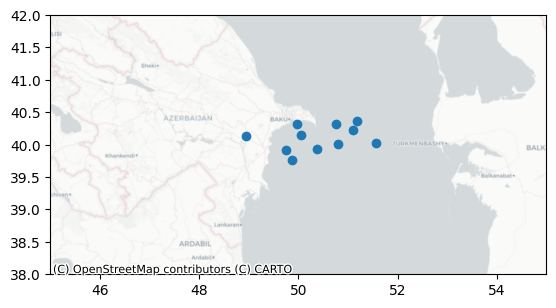

In [19]:
ax = gem_gdf[gem_gdf['Country'] == 'Azerbaijan'].plot()
ax.set(xlim=(45, 55), ylim=(38, 42))
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gem_gdf.crs)

